## New York Taxi Data from NAB

This code is based on the codes below.
- *Anomaly Detection with Time Series Forecasting* by @adithya and @Adam Kirstein (https://www.kaggle.com/adithya44/anomaly-detection-with-time-series-forecasting).
- *Structural Time Series modeling in TensorFlow Probability* (https://blog.tensorflow.org/2019/03/structural-time-series-modeling-in.html)
- *Time Series forecasting using Auto ARIMA in python* by Sushmitha Pulagam (https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import tensorflow_probability as tfp

In [2]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error

In [3]:
import os

In [4]:
from tqdm import tqdm

In [5]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [6]:
df = pd.read_csv('./nyc_taxi.csv')
df.columns = ['timestamp', 'value']
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [7]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [8]:
df.tail()

,timestamp,value
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591
10319,2015-01-31 23:30:00,26288


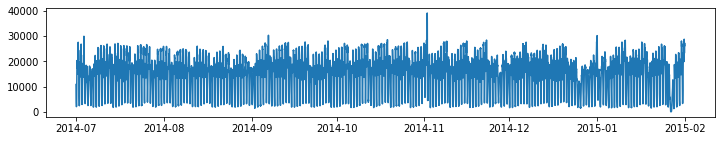

In [9]:
plt.figure(figsize=(12, 2))
plt.plot(df['timestamp'], df['value'])

/Users/eunjeesung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


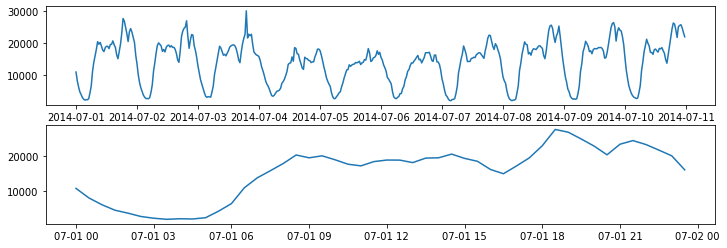

In [10]:
season_len = 48 # a timestamp every 30 minutes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))
ax1.plot(df['timestamp'][:season_len*10], df['value'][:season_len*10])
ax2.plot(df['timestamp'][:season_len], df['value'][:season_len])
fig.show()

### Train/Test Split

In [11]:
split_idx = int(len(df) * 0.7)
train, test = df.value[0:-split_idx], df.value[split_idx:]
train_log, test_log = np.log10(train), np.log10(test)

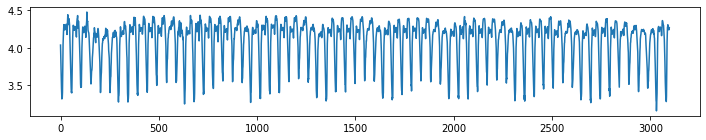

In [12]:
plt.figure(figsize=(12, 2))
plt.plot(train_log)

In [13]:
# Run Augmented Dickey-Fuller Test
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(train))
print(adf_test.should_diff(train_log))

(0.01, False)
(0.01, False)


### Prediction

In [14]:
# # TODO: hyperparameter tuning
pdq = (2, 1, 1)
pdqs = (2, 1, 0, 48)

In [15]:
model = sm.tsa.SARIMAX(list(train_log),
                       order=pdq,
                       seasonal_order=pdqs,
                       simple_differencing=True,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

In [ ]:
history = list(train_log)
window_len = 48 * 3
preds, preds_log = [], []

for t in tqdm(range(split_idx, split_idx+48)):
    model_fit = model.fit(history[-window_len:],
              disp=1,
              maxiter=1)
    output = model_fit.forecast()
    preds_log.append(output[0])
    print(output)
    yhat = 10**output[0]
    preds.append(yhat)
    obs = test_log[t]
    history.append(obs)

In [23]:
output = model_fit.forecast(48)

In [ ]:
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.plot(test_log, label='Real')
plt.plot(10**output, color='red',label='Predicted')
plt.legend(loc='upper right')
plt.show()